In [5]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Info in <ACLiC>: unmodified script has already been compiled and loaded
Info in <ACLiC>: unmodified script has already been compiled and loaded


In [6]:
chainSGN = ROOT.TChain("TestTree")
chainSGN.Add("/data/submit/pdmonte/TMVA_models/sample0.root/dataset/TestTree")
chainSGN.Add("/data/submit/pdmonte/TMVA_models/sample1.root/dataset/TestTree")
chainSGN.Add("/data/submit/pdmonte/TMVA_models/sample2.root/dataset/TestTree")

df = ROOT.RDataFrame(chainSGN)
df = (df.Define("HCandMass_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta_GEN, goodMeson_phi_GEN, goodMeson_mass_GEN, goodPhotons_pt_GEN, goodPhotons_eta_GEN, goodPhotons_phi_GEN, 0)")
        .Define("HCandMass_varGEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta, goodMeson_phi, goodMeson_mass, goodPhotons_pt, goodPhotons_eta, goodPhotons_phi, 0)")
        .Define("goodMeson_pt_PRED", "BDTG")
        .Define("goodPhotons_pt_PRED", "goodPhotons_pt")
        .Define("HCandMass_varPRED", "compute_HiggsVars_var(goodMeson_pt_PRED, goodMeson_eta, goodMeson_phi, goodMeson_mass, goodPhotons_pt_PRED, goodPhotons_eta, goodPhotons_phi, 0)"))

#print(df.GetColumnNames())

In [7]:
#ROOT.gInterpreter.ProcessLine('''
#TMVA::Experimental::RReader model("/data/submit/pdmonte/TMVA_models/weightsGOOD/TMVARegression_BDTG.weights.xml");
#computeModel = TMVA::Experimental::Compute<14, float>(model);
#''')
'''                        
variables = ROOT.model.GetVariableNames()
print(variables)'''

'                        \nvariables = ROOT.model.GetVariableNames()\nprint(variables)'

In [8]:
cols = ["goodMeson_pt", "goodMeson_pt_GEN", "goodMeson_pt_PRED", "goodPhotons_pt", "goodPhotons_pt_GEN", "goodPhotons_pt_PRED"]
x = df.AsNumpy(columns=cols)
pddf = pd.DataFrame(x)
display(pddf)

goodMesonDiffReco = pddf["goodMeson_pt"].values - pddf["goodMeson_pt_GEN"].values
goodMesonDiffPred = pddf["goodMeson_pt_PRED"].values - pddf["goodMeson_pt_GEN"].values
errorMesonReco = np.sqrt(np.mean(goodMesonDiffReco**2))
errorMesonPred = np.sqrt(np.mean(goodMesonDiffPred**2))
print("RecoMeson:\t {:.3f}\t\tPredMeson:\t {:.3f}".format(round(errorMesonReco, 3), round(errorMesonPred, 3)))

goodPhotonsDiffReco = pddf["goodPhotons_pt"].values - pddf["goodPhotons_pt_GEN"].values
goodPhotonsDiffPred = pddf["goodPhotons_pt_PRED"].values - pddf["goodPhotons_pt_GEN"].values
errorPhotonsReco = np.sqrt(np.mean(goodPhotonsDiffReco**2))
errorPhotonsPred = np.sqrt(np.mean(goodPhotonsDiffPred**2))
print("RecoPhotons:\t {:.3f}\t\tPredPhotons:\t {:.3f}".format(round(errorPhotonsReco, 3), round(errorPhotonsPred, 3)))

,goodMeson_pt,goodMeson_pt_GEN,goodMeson_pt_PRED,goodPhotons_pt,goodPhotons_pt_GEN,goodPhotons_pt_PRED
0,90.113838,90.746994,96.331100,171.851868,172.000,171.851868
1,63.436893,67.882050,70.102638,54.002857,56.375,54.002857
2,176.795471,176.560501,177.795746,158.305222,163.000,158.305222
3,63.699192,67.028198,67.839523,43.523846,43.750,43.523846
4,52.138069,51.249359,48.058022,191.510559,192.500,191.510559
...,...,...,...,...,...,...
43058,74.323372,73.682037,73.875938,50.113457,50.375,50.113457
43059,58.046505,60.280945,65.483849,49.243237,56.250,49.243237
43060,245.811188,227.873810,230.717285,39.599762,39.500,39.599762
43061,72.468712,75.027809,73.364159,59.918953,60.750,59.918953


RecoMeson:	 10.048		PredMeson:	 7.744
RecoPhotons:	 1.793		PredPhotons:	 1.793


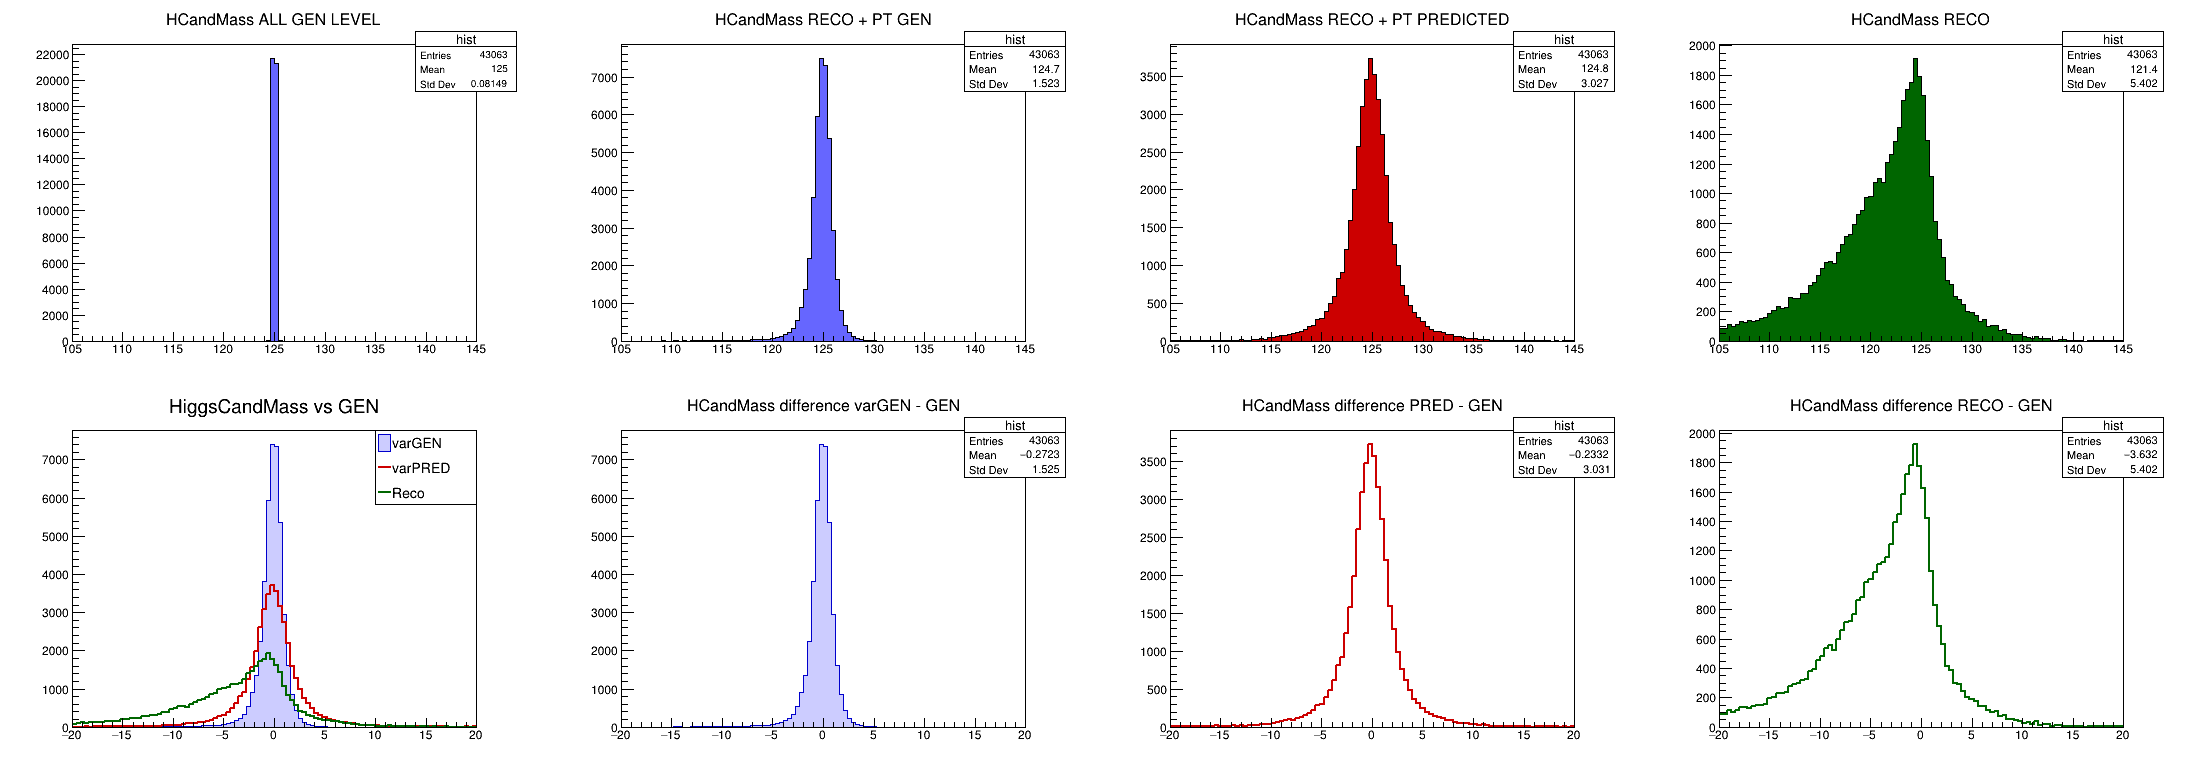

In [9]:
canvas = ROOT.TCanvas("canvas", "canvas", 2200, 800)
canvas.Divide(4, 2)

nbins, xlow, xhigh = 100, 105, 145
xlowdiff, xhighdiff = -20, 20

h1 = df.Histo1D(("hist", "HCandMass ALL GEN LEVEL", nbins, xlow, xhigh), "HCandMass_GEN")
h2 = df.Histo1D(("hist", "HCandMass RECO + PT GEN", nbins, xlow, xhigh), "HCandMass_varGEN")
h3 = df.Histo1D(("hist", "HCandMass RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED")
h4 = df.Histo1D(("hist", "HCandMass RECO", nbins, xlow, xhigh), "HCandMass")

h6 = df.Define("good", "HCandMass_varGEN - HCandMass_GEN").Histo1D(("hist", "HCandMass difference varGEN - GEN", nbins, xlowdiff, xhighdiff), "good")
h7 = df.Define("good", "HCandMass_varPRED - HCandMass_GEN").Histo1D(("hist", "HCandMass difference PRED - GEN", nbins, xlowdiff, xhighdiff), "good")
h8 = df.Define("good", "HCandMass - HCandMass_GEN").Histo1D(("hist", "HCandMass difference RECO - GEN", nbins, xlowdiff, xhighdiff), "good")


h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kBlue-7)
h2.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kRed+1)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kGreen+3)
h4.SetLineColor(ROOT.kBlack)

h6.SetLineColor(ROOT.kBlue+1)
h6.SetFillColor(ROOT.kBlue-10)
h7.SetLineColor(ROOT.kRed+1)
h8.SetLineColor(ROOT.kGreen+3)
h6.SetLineWidth(1)
h7.SetLineWidth(2)
h8.SetLineWidth(2)


p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")
p = canvas.cd(4)
h4.Draw("hist")

p = canvas.cd(6)
h6.Draw("hist")
p = canvas.cd(7)
h7.Draw("hist")
p = canvas.cd(8)
h8.Draw("hist")
p = canvas.cd(5)
stack = ROOT.THStack("stack", "HiggsCandMass vs GEN")
stack.Add(h6.GetValue())
stack.Add(h7.GetValue())
stack.Add(h8.GetValue())
stack.Draw("hist nostack")
legend = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend.SetMargin(0.17)
#legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(h6.GetValue(), "varGEN", "f")
legend.AddEntry(h7.GetValue(), "varPRED", "l")
legend.AddEntry(h8.GetValue(), "Reco", "l")
legend.Draw()

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


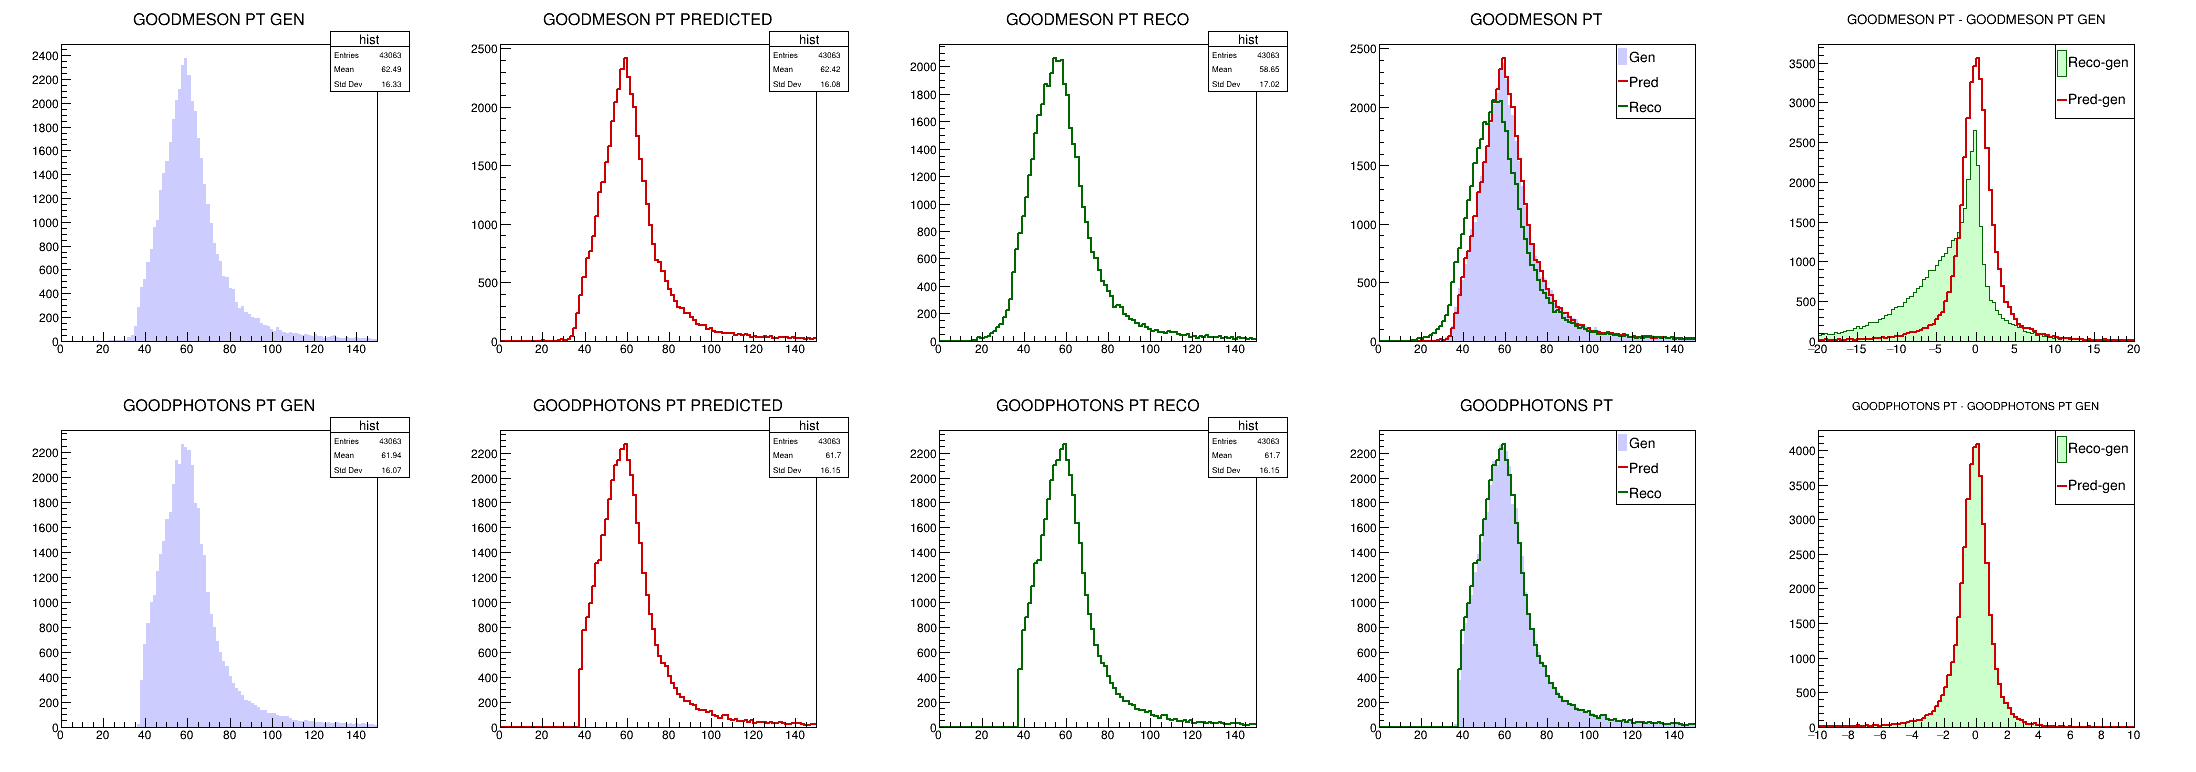

In [10]:
canvas = ROOT.TCanvas("canvas", "canvas", 2200, 800)
canvas.Divide(5, 2)

nbins, xlow, xhigh = 100, 0, 150
xlowdiff, xhighdiff = -20, 20

h1 = df.Histo1D(("hist", "GOODMESON PT GEN", nbins, xlow, xhigh), "goodMeson_pt_GEN")
h2 = df.Histo1D(("hist", "GOODMESON PT PREDICTED", nbins, xlow, xhigh), "goodMeson_pt_PRED")
h3 = df.Histo1D(("hist", "GOODMESON PT RECO", nbins, xlow, xhigh), "goodMeson_pt")
h5_1 = df.Define("good", "goodMeson_pt - goodMeson_pt_GEN").Histo1D(("hist", "RECO - GEN", nbins, xlowdiff, xhighdiff), "good")
h5_2 = df.Define("good", "goodMeson_pt_PRED - goodMeson_pt_GEN").Histo1D(("hist", "PRED - GEN", nbins, xlowdiff, xhighdiff), "good")

xlowdiff, xhighdiff = -10, 10
h6 = df.Histo1D(("hist", "GOODPHOTONS PT GEN", nbins, xlow, xhigh), "goodPhotons_pt_GEN")
h7 = df.Histo1D(("hist", "GOODPHOTONS PT PREDICTED", nbins, xlow, xhigh), "goodPhotons_pt_PRED")
h8 = df.Histo1D(("hist", "GOODPHOTONS PT RECO", nbins, xlow, xhigh), "goodPhotons_pt")
h10_1 = df.Define("good", "goodPhotons_pt - goodPhotons_pt_GEN").Histo1D(("hist", "RECO - GEN", nbins, xlowdiff, xhighdiff), "good")
h10_2 = df.Define("good", "goodPhotons_pt_PRED - goodPhotons_pt_GEN").Histo1D(("hist", "PRED - GEN", nbins, xlowdiff, xhighdiff), "good")

h1.SetLineColor(ROOT.kBlue+1)
h1.SetFillColor(ROOT.kBlue-10)
h1.SetLineWidth(0)
h2.SetLineColor(ROOT.kRed+1)
h2.SetLineWidth(2)
h3.SetLineColor(ROOT.kGreen+3)
h3.SetLineWidth(2)
h5_2.SetLineColor(ROOT.kRed+1)
h5_2.SetLineWidth(2)
h5_1.SetLineColor(ROOT.kGreen+3)
h5_1.SetFillColor(ROOT.kGreen-10)
h5_1.SetLineWidth(1)

p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")
p = canvas.cd(4)
stack = ROOT.THStack("stack", "GOODMESON PT")
stack.Add(h1.GetValue())
stack.Add(h2.GetValue())
stack.Add(h3.GetValue())
stack.Draw("hist nostack")
legend = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend.SetMargin(0.17)
#legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(h1.GetValue(), "Gen", "f")
legend.AddEntry(h2.GetValue(), "Pred", "l")
legend.AddEntry(h3.GetValue(), "Reco", "l")
legend.Draw()

p = canvas.cd(5)
stack2 = ROOT.THStack("stack", "GOODMESON PT - GOODMESON PT GEN")
stack2.Add(h5_1.GetValue())
stack2.Add(h5_2.GetValue())
stack2.Draw("hist nostack")
legend2 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend2.SetMargin(0.17)
#legend.SetBorderSize(0)
legend2.SetTextSize(0.04)
legend2.AddEntry(h5_1.GetValue(), "Reco-gen", "f")
legend2.AddEntry(h5_2.GetValue(), "Pred-gen", "l")
legend2.Draw()


h6.SetLineColor(ROOT.kBlue+1)
h6.SetFillColor(ROOT.kBlue-10)
h6.SetLineWidth(0)
h7.SetLineColor(ROOT.kRed+1)
h7.SetLineWidth(2)
h8.SetLineColor(ROOT.kGreen+3)
h8.SetLineWidth(2)
h10_2.SetLineColor(ROOT.kRed+1)
h10_2.SetLineWidth(2)
h10_1.SetLineColor(ROOT.kGreen+3)
h10_1.SetFillColor(ROOT.kGreen-10)
h10_1.SetLineWidth(1)

p = canvas.cd(6)
h6.Draw("hist")
p = canvas.cd(7)
h7.Draw("hist")
p = canvas.cd(8)
h8.Draw("hist")
p = canvas.cd(9)
stack3 = ROOT.THStack("stack", "GOODPHOTONS PT")
stack3.Add(h6.GetValue())
stack3.Add(h7.GetValue())
stack3.Add(h8.GetValue())
stack3.Draw("hist nostack")
legend3 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend3.SetMargin(0.17)
#legend.SetBorderSize(0)
legend3.SetTextSize(0.04)
legend3.AddEntry(h6.GetValue(), "Gen", "f")
legend3.AddEntry(h7.GetValue(), "Pred", "l")
legend3.AddEntry(h8.GetValue(), "Reco", "l")
legend3.Draw()

p = canvas.cd(10)
stack4 = ROOT.THStack("stack", "GOODPHOTONS PT - GOODPHOTONS PT GEN")
stack4.Add(h10_1.GetValue())
stack4.Add(h10_2.GetValue())
stack4.Draw("hist nostack")
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
#legend.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(h10_1.GetValue(), "Reco-gen", "f")
legend4.AddEntry(h10_2.GetValue(), "Pred-gen", "l")
legend4.Draw()

canvas.Draw()

In [104]:
date = "JUN29"

chainSGN = ROOT.TChain("events")
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1038_GFcat_OmegaCat_2018.root".format(date))
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_Phi3Cat_2018.root".format(date))
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1040_GFcat_D0StarRhoCat_2018.root".format(date))
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)
df = (df.Define("HCandMass_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta_GEN, goodMeson_phi_GEN, goodMeson_mass_GEN, goodPhotons_pt_GEN, goodPhotons_eta_GEN, goodPhotons_phi_GEN, 0)")
        .Define("HCandMass_goodMeson_pt_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_eta_GEN", "compute_HiggsVars_var(goodMeson_pt[0], goodMeson_eta_GEN, goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_phi_GEN", "compute_HiggsVars_var(goodMeson_pt[0], goodMeson_eta[0], goodMeson_phi_GEN, goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_mass_GEN", "compute_HiggsVars_var(goodMeson_pt[0], goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass_GEN, goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodPhotons_pt_GEN", "compute_HiggsVars_var(goodMeson_pt[0], goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt_GEN, goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodPhotons_eta_GEN", "compute_HiggsVars_var(goodMeson_pt[0], goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta_GEN, goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodPhotons_phi_GEN", "compute_HiggsVars_var(goodMeson_pt[0], goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi_GEN, 0)"))

REPLACING ONE VARIABLE WITH THE GEN LEVEL EQUIVALENT
MOST IMPORTANT TO PREDICT TO IMPROVE: GOODMESON PT!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


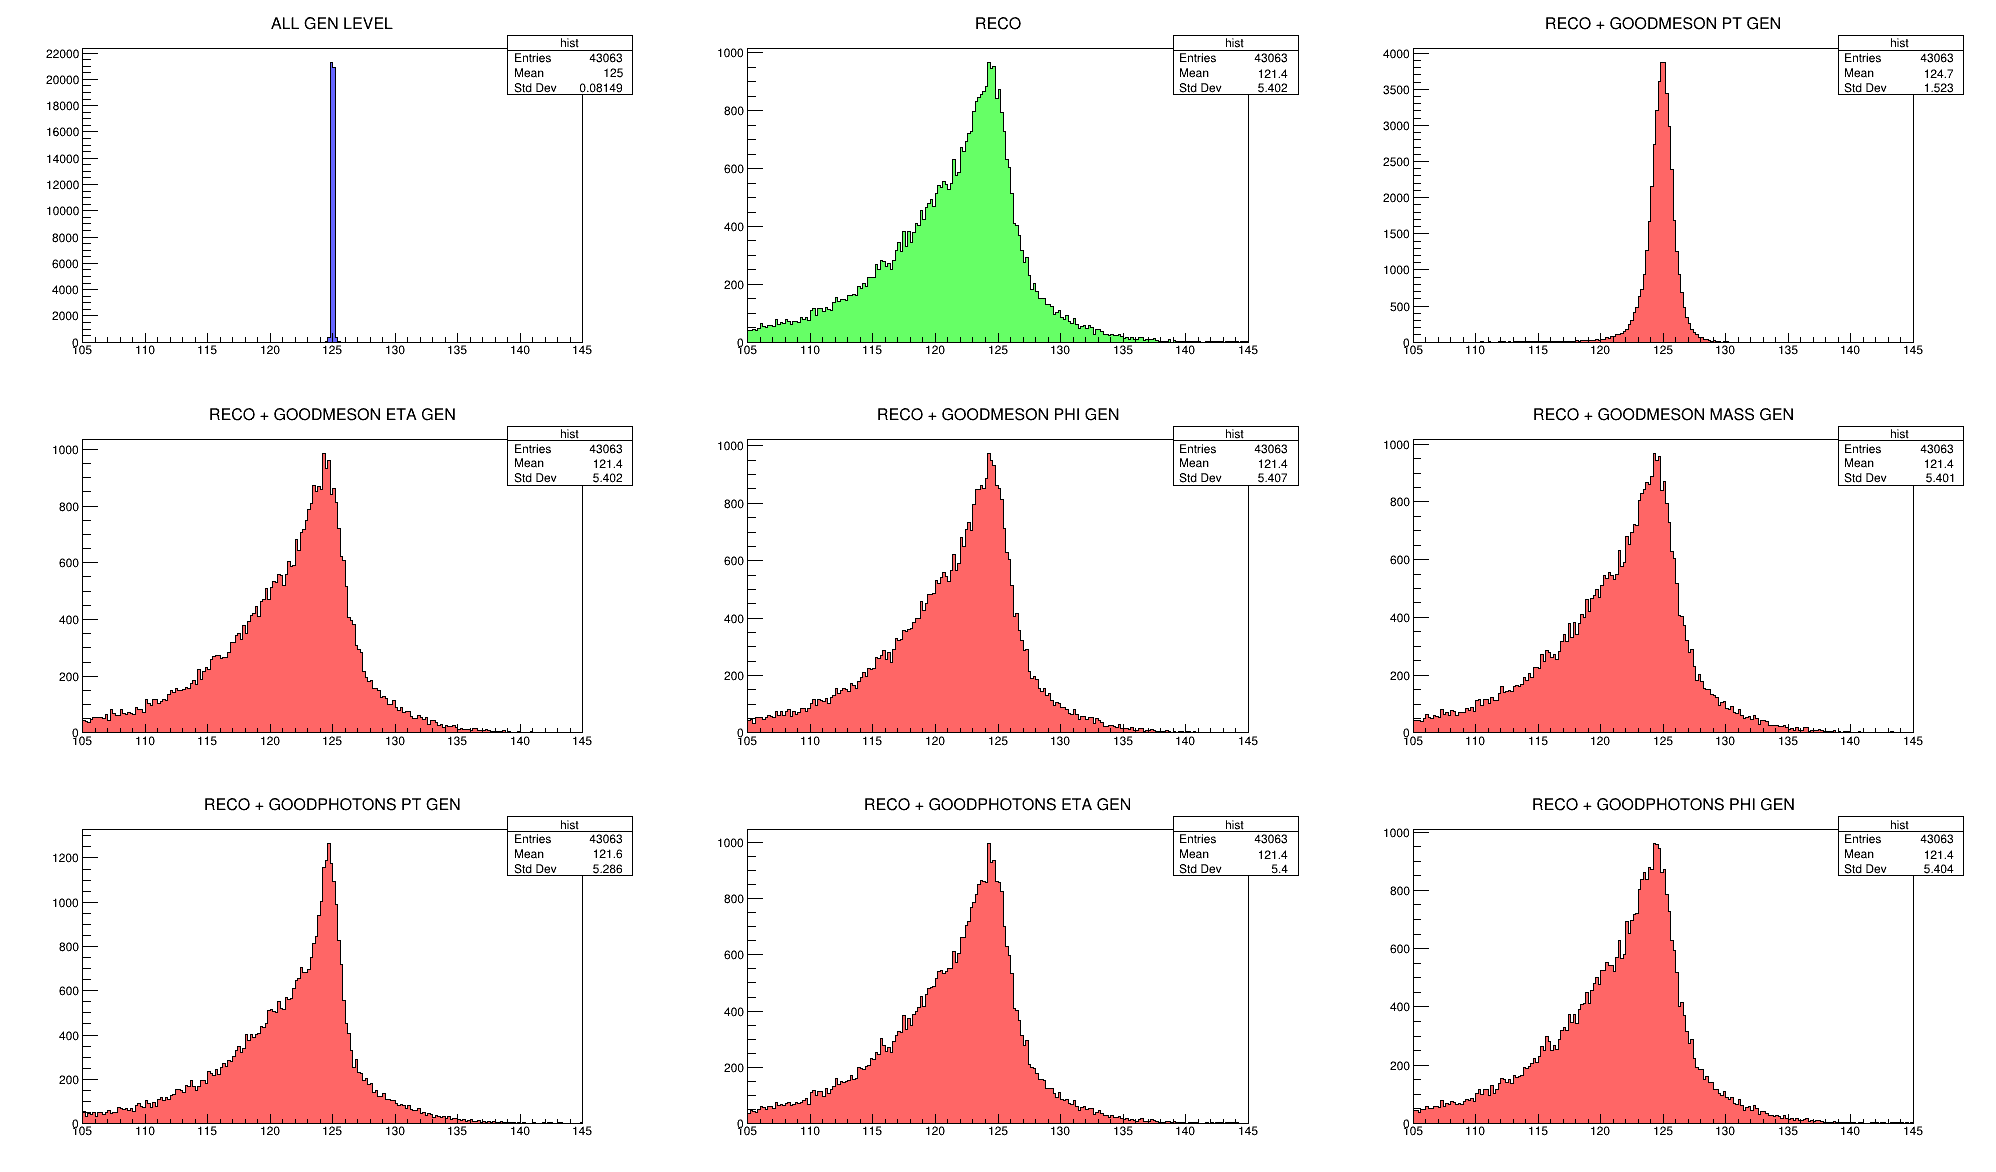

In [139]:
canvas = ROOT.TCanvas("canvas", "canvas", 2000, 1200)
canvas.Divide(3, 3)

nbins, xlow, xhigh = 200, 105, 145

h1 = df.Histo1D(("hist", "ALL GEN LEVEL", nbins, xlow, xhigh), "HCandMass_GEN")
h2 = df.Histo1D(("hist", "RECO", nbins, xlow, xhigh), "HCandMass")
h3 = df.Histo1D(("hist", "RECO + GOODMESON PT GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_pt_GEN")
h4 = df.Histo1D(("hist", "RECO + GOODMESON ETA GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_eta_GEN")
h5 = df.Histo1D(("hist", "RECO + GOODMESON PHI GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_phi_GEN")
h6 = df.Histo1D(("hist", "RECO + GOODMESON MASS GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_mass_GEN")
h7 = df.Histo1D(("hist", "RECO + GOODPHOTONS PT GEN", nbins, xlow, xhigh), "HCandMass_goodPhotons_pt_GEN")
h8 = df.Histo1D(("hist", "RECO + GOODPHOTONS ETA GEN", nbins, xlow, xhigh), "HCandMass_goodPhotons_eta_GEN")
h9 = df.Histo1D(("hist", "RECO + GOODPHOTONS PHI GEN", nbins, xlow, xhigh), "HCandMass_goodPhotons_phi_GEN")

h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kGreen-7)
h2.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kRed-7)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kRed-7)
h4.SetLineColor(ROOT.kBlack)
h5.SetFillColor(ROOT.kRed-7)
h5.SetLineColor(ROOT.kBlack)
h6.SetFillColor(ROOT.kRed-7)
h6.SetLineColor(ROOT.kBlack)
h7.SetFillColor(ROOT.kRed-7)
h7.SetLineColor(ROOT.kBlack)
h8.SetFillColor(ROOT.kRed-7)
h8.SetLineColor(ROOT.kBlack)
h9.SetFillColor(ROOT.kRed-7)
h9.SetLineColor(ROOT.kBlack)

p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")
p = canvas.cd(4)
h4.Draw("hist")
p = canvas.cd(5)
h5.Draw("hist")
p = canvas.cd(6)
h6.Draw("hist")
p = canvas.cd(7)
h7.Draw("hist")
p = canvas.cd(8)
h8.Draw("hist")
p = canvas.cd(9)
h9.Draw("hist")

canvas.Draw()

print("REPLACING ONE VARIABLE WITH THE GEN LEVEL EQUIVALENT")
print("MOST IMPORTANT TO PREDICT TO IMPROVE: GOODMESON PT!")

In [140]:
df = (df.Define("HCandMass_goodMeson_pt_goodMeson_eta_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta_GEN, goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_pt_goodMeson_phi_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi_GEN, goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_pt_goodMeson_mass_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass_GEN, goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_pt_goodPhotons_pt_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt_GEN, goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_pt_goodPhotons_eta_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta_GEN, goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_pt_goodPhotons_phi_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi_GEN, 0)"))

REPLACING TWO VARIABLES (GOODMESON PT + VAR) WITH THE GEN LEVEL EQUIVALENT
MOST IMPORTANT TO PREDICT TO IMPROVE: GOODPHOTON PT!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


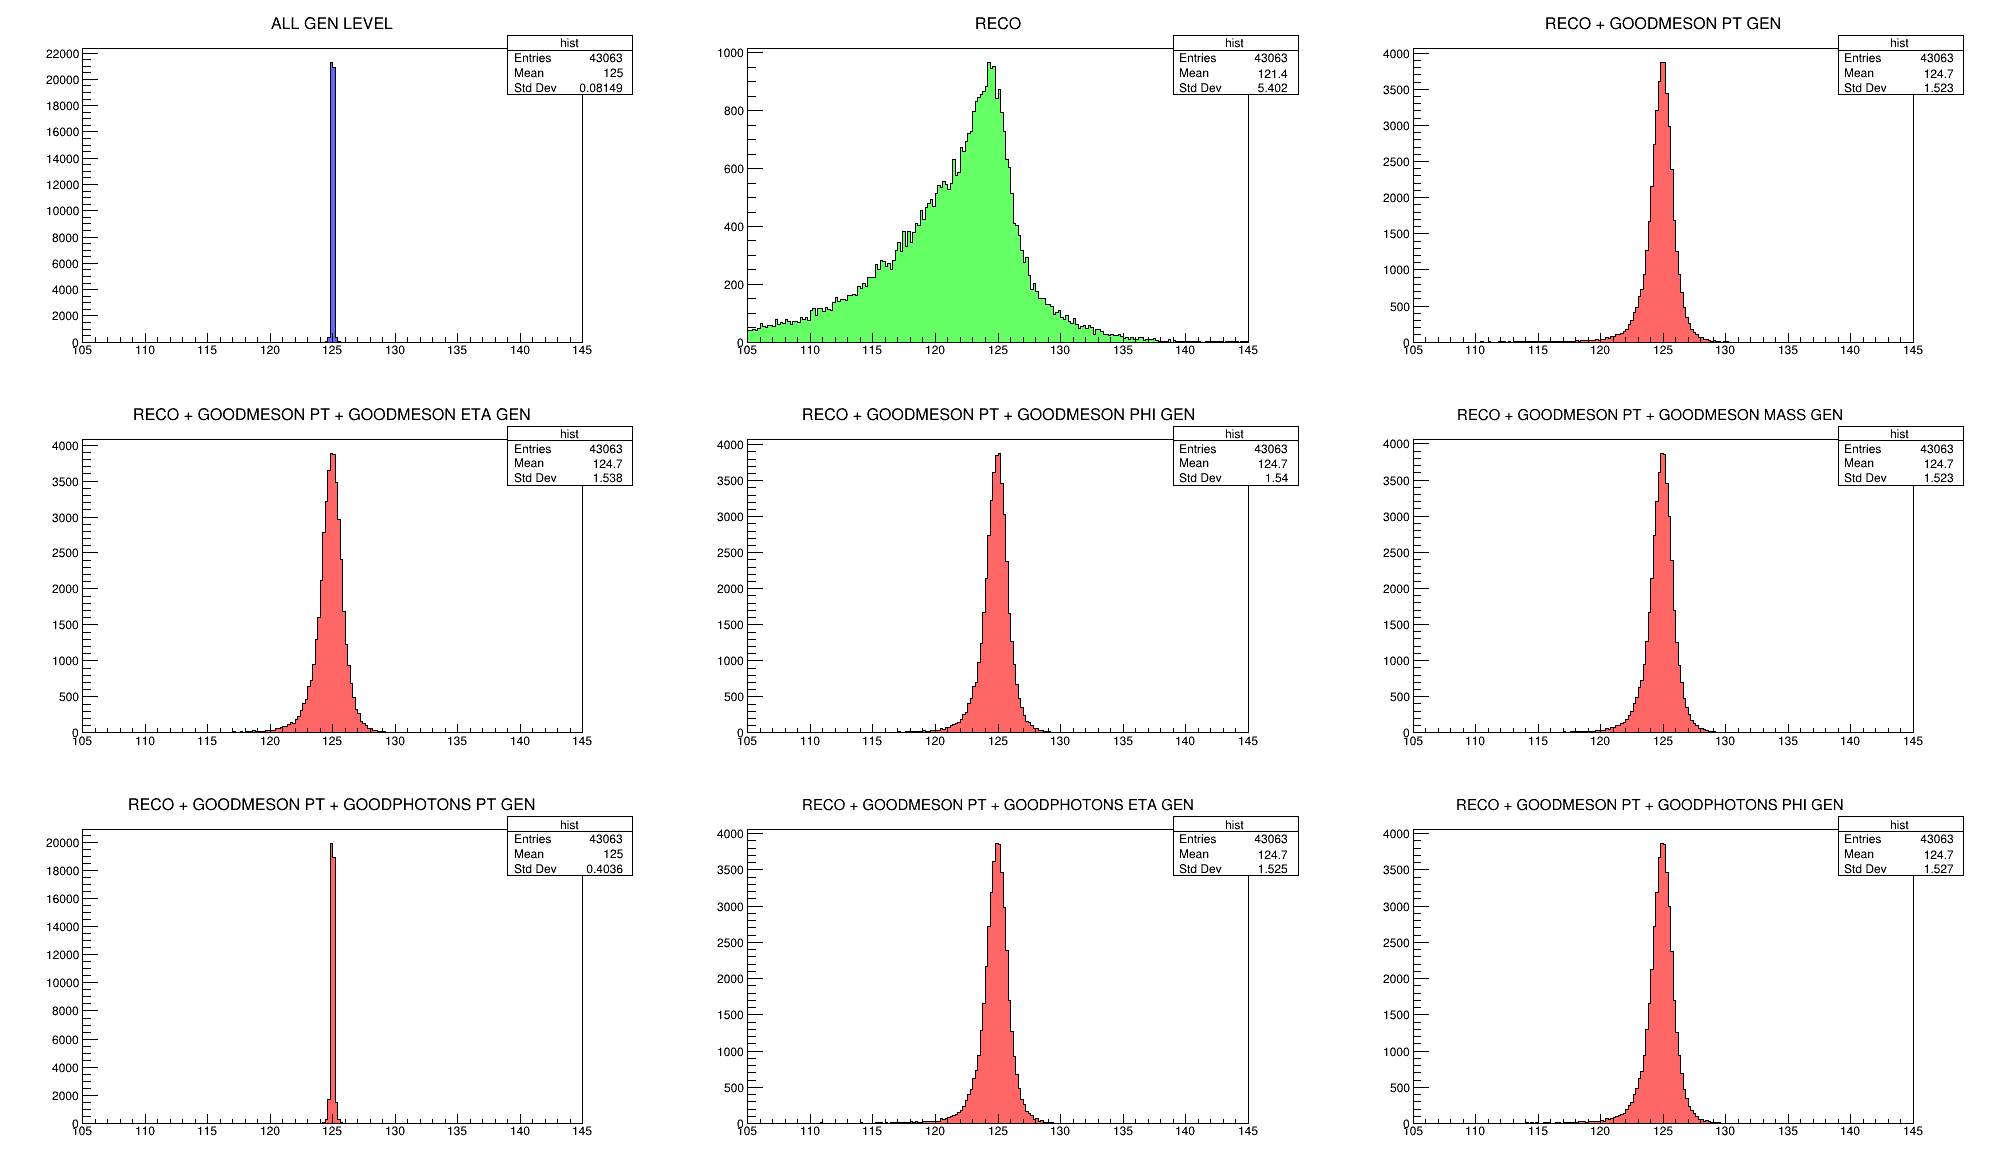

In [141]:
canvas = ROOT.TCanvas("canvas", "canvas", 2000, 1200)
canvas.Divide(3, 3)

nbins, xlow, xhigh = 200, 105, 145

h1 = df.Histo1D(("hist", "ALL GEN LEVEL", nbins, xlow, xhigh), "HCandMass_GEN")
h2 = df.Histo1D(("hist", "RECO", nbins, xlow, xhigh), "HCandMass")
h3 = df.Histo1D(("hist", "RECO + GOODMESON PT GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_pt_GEN")

h4 = df.Histo1D(("hist", "RECO + GOODMESON PT + GOODMESON ETA GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_pt_goodMeson_eta_GEN")
h5 = df.Histo1D(("hist", "RECO + GOODMESON PT + GOODMESON PHI GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_pt_goodMeson_phi_GEN")
h6 = df.Histo1D(("hist", "RECO + GOODMESON PT + GOODMESON MASS GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_pt_goodMeson_mass_GEN")
h7 = df.Histo1D(("hist", "RECO + GOODMESON PT + GOODPHOTONS PT GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_pt_goodPhotons_pt_GEN")
h8 = df.Histo1D(("hist", "RECO + GOODMESON PT + GOODPHOTONS ETA GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_pt_goodPhotons_eta_GEN")
h9 = df.Histo1D(("hist", "RECO + GOODMESON PT + GOODPHOTONS PHI GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_pt_goodPhotons_phi_GEN")

h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kGreen-7)
h2.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kRed-7)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kRed-7)
h4.SetLineColor(ROOT.kBlack)
h5.SetFillColor(ROOT.kRed-7)
h5.SetLineColor(ROOT.kBlack)
h6.SetFillColor(ROOT.kRed-7)
h6.SetLineColor(ROOT.kBlack)
h7.SetFillColor(ROOT.kRed-7)
h7.SetLineColor(ROOT.kBlack)
h8.SetFillColor(ROOT.kRed-7)
h8.SetLineColor(ROOT.kBlack)
h9.SetFillColor(ROOT.kRed-7)
h9.SetLineColor(ROOT.kBlack)

p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")
p = canvas.cd(4)
h4.Draw("hist")
p = canvas.cd(5)
h5.Draw("hist")
p = canvas.cd(6)
h6.Draw("hist")
p = canvas.cd(7)
h7.Draw("hist")
p = canvas.cd(8)
h8.Draw("hist")
p = canvas.cd(9)
h9.Draw("hist")

canvas.Draw()

print("REPLACING TWO VARIABLES (GOODMESON PT + VAR) WITH THE GEN LEVEL EQUIVALENT")
print("MOST IMPORTANT TO PREDICT TO IMPROVE: GOODPHOTON PT!")

In [142]:
df = (df.Define("HCandMass_goodMeson_pt_goodPhotons_pt_goodMeson_eta_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta_GEN, goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt_GEN, goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_pt_goodPhotons_pt_goodMeson_phi_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi_GEN, goodMeson_mass[0], goodPhotons_pt_GEN, goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_pt_goodPhotons_pt_goodMeson_mass_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass_GEN, goodPhotons_pt_GEN, goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_pt_goodPhotons_pt_goodPhotons_eta_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt_GEN, goodPhotons_eta_GEN, goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_pt_goodPhotons_pt_goodPhotons_phi_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt_GEN, goodPhotons_eta[0], goodPhotons_phi_GEN, 0)"))

REPLACING THREE VARIABLES (GOODMESON PT + GOODPHOTON PT + VAR) WITH THE GEN LEVEL EQUIVALENT
MOST IMPORTANT TO PREDICT TO IMPROVE: UNCLEAR


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


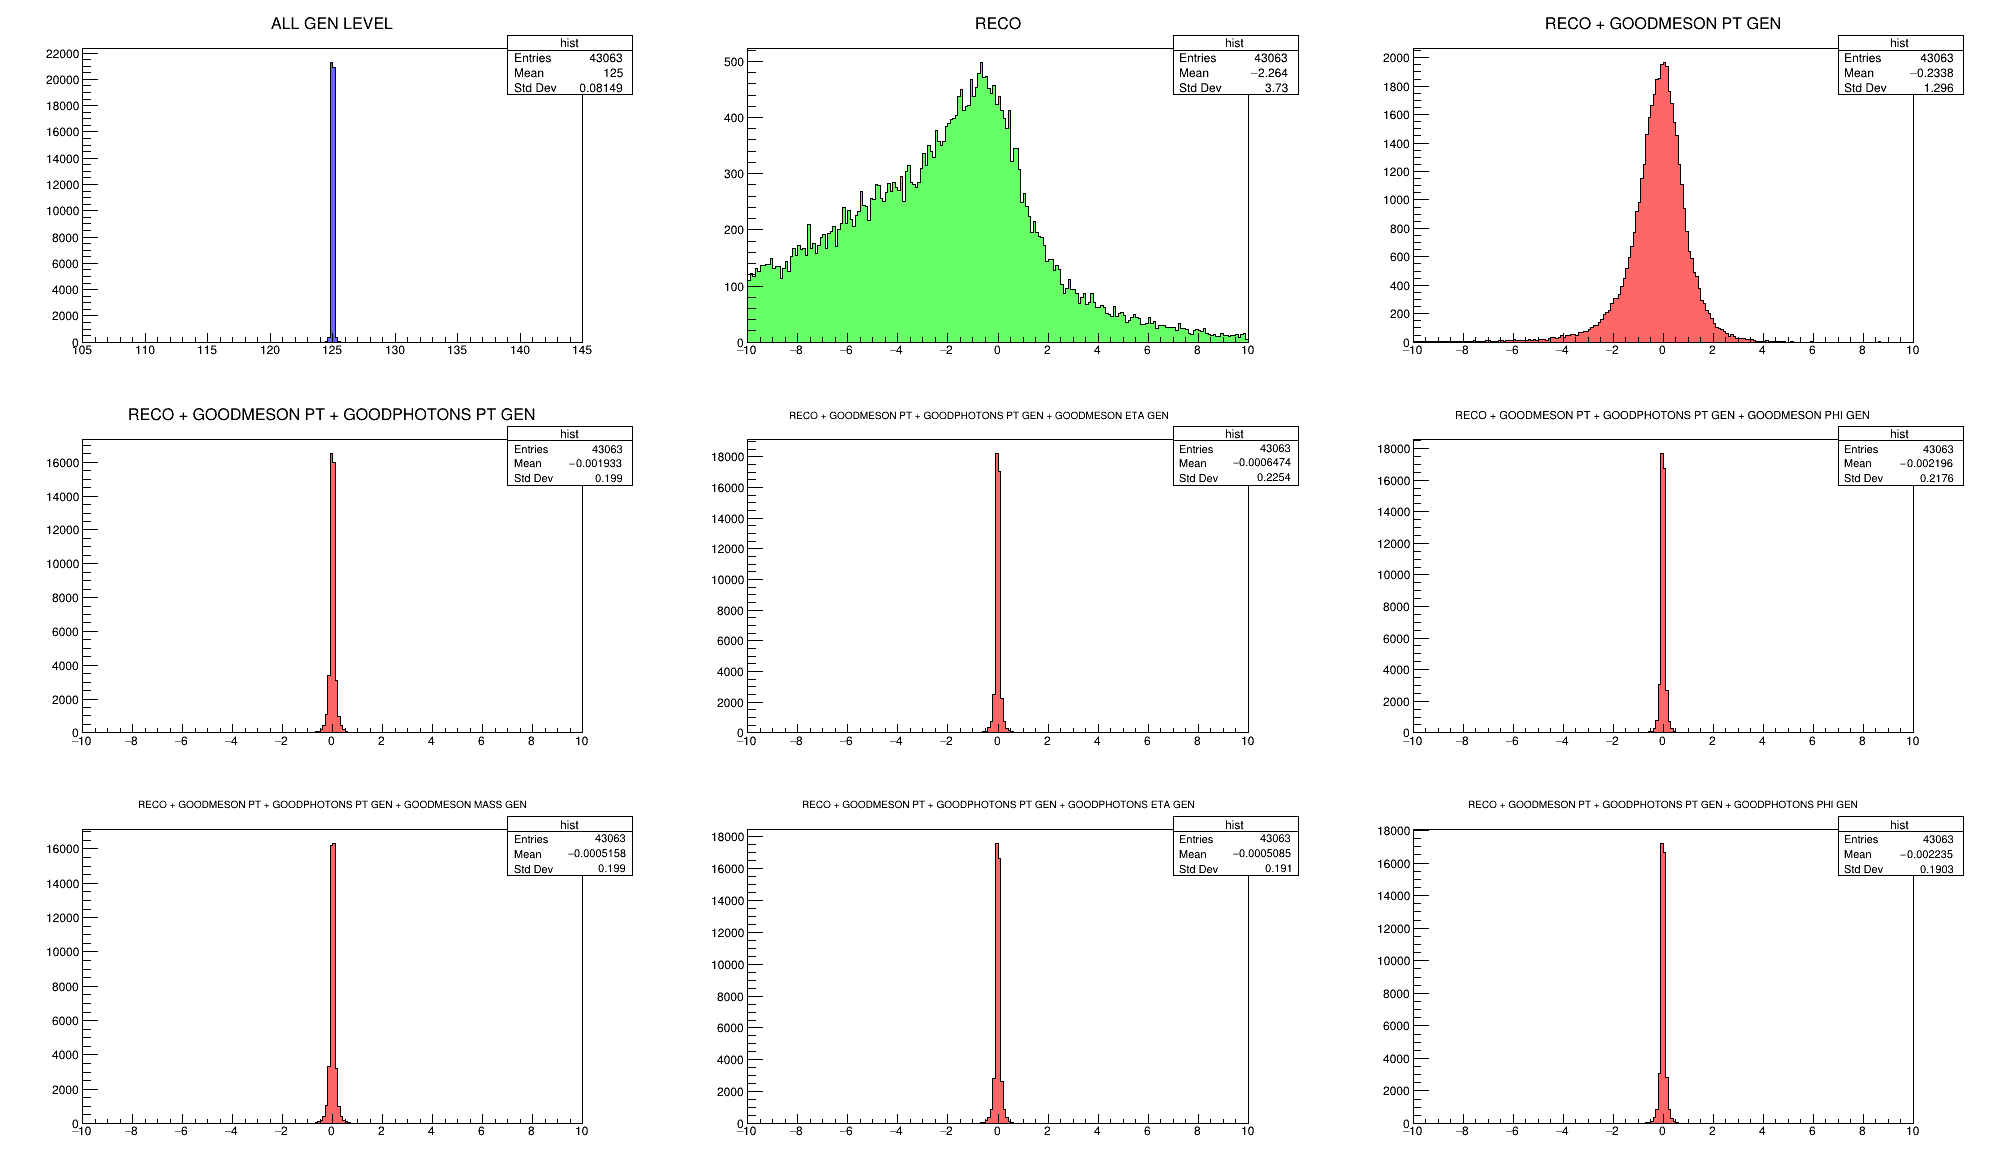

In [143]:
canvas = ROOT.TCanvas("canvas", "canvas", 2000, 1200)
canvas.Divide(3, 3)

nbins, xlow, xhigh = 200, -10, 10

h1 = df.Histo1D(("hist", "ALL GEN LEVEL", nbins, 105, 145), "HCandMass_GEN")
h2 = df.Define("good", "HCandMass - HCandMass_GEN").Histo1D(("hist", "RECO", nbins, xlow, xhigh), "good")
h3 = df.Define("good", "HCandMass_goodMeson_pt_GEN - HCandMass_GEN").Histo1D(("hist", "RECO + GOODMESON PT GEN", nbins, xlow, xhigh), "good")
h4 = df.Define("good", "HCandMass_goodMeson_pt_goodPhotons_pt_GEN - HCandMass_GEN").Histo1D(("hist", "RECO + GOODMESON PT + GOODPHOTONS PT GEN", nbins, xlow, xhigh), "good")

h5 = df.Define("good", "HCandMass_goodMeson_pt_goodPhotons_pt_goodMeson_eta_GEN - HCandMass_GEN").Histo1D(("hist", "RECO + GOODMESON PT + GOODPHOTONS PT GEN + GOODMESON ETA GEN", nbins, xlow, xhigh), "good")
h6 = df.Define("good", "HCandMass_goodMeson_pt_goodPhotons_pt_goodMeson_phi_GEN - HCandMass_GEN").Histo1D(("hist", "RECO + GOODMESON PT + GOODPHOTONS PT GEN + GOODMESON PHI GEN", nbins, xlow, xhigh), "good")
h7 = df.Define("good", "HCandMass_goodMeson_pt_goodPhotons_pt_goodMeson_mass_GEN - HCandMass_GEN").Histo1D(("hist", "RECO + GOODMESON PT + GOODPHOTONS PT GEN + GOODMESON MASS GEN", nbins, xlow, xhigh), "good")
h8 = df.Define("good", "HCandMass_goodMeson_pt_goodPhotons_pt_goodPhotons_eta_GEN - HCandMass_GEN").Histo1D(("hist", "RECO + GOODMESON PT + GOODPHOTONS PT GEN + GOODPHOTONS ETA GEN", nbins, xlow, xhigh), "good")
h9 = df.Define("good", "HCandMass_goodMeson_pt_goodPhotons_pt_goodPhotons_phi_GEN - HCandMass_GEN").Histo1D(("hist", "RECO + GOODMESON PT + GOODPHOTONS PT GEN + GOODPHOTONS PHI GEN", nbins, xlow, xhigh), "good")

h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kGreen-7)
h2.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kRed-7)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kRed-7)
h4.SetLineColor(ROOT.kBlack)
h5.SetFillColor(ROOT.kRed-7)
h5.SetLineColor(ROOT.kBlack)
h6.SetFillColor(ROOT.kRed-7)
h6.SetLineColor(ROOT.kBlack)
h7.SetFillColor(ROOT.kRed-7)
h7.SetLineColor(ROOT.kBlack)
h8.SetFillColor(ROOT.kRed-7)
h8.SetLineColor(ROOT.kBlack)
h9.SetFillColor(ROOT.kRed-7)
h9.SetLineColor(ROOT.kBlack)

p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")
p = canvas.cd(4)
h4.Draw("hist")
p = canvas.cd(5)
h5.Draw("hist")
p = canvas.cd(6)
h6.Draw("hist")
p = canvas.cd(7)
h7.Draw("hist")
p = canvas.cd(8)
h8.Draw("hist")
p = canvas.cd(9)
h9.Draw("hist")

canvas.Draw()

print("REPLACING THREE VARIABLES (GOODMESON PT + GOODPHOTON PT + VAR) WITH THE GEN LEVEL EQUIVALENT")
print("MOST IMPORTANT TO PREDICT TO IMPROVE: UNCLEAR")

In [144]:
df = (df.Define("SqError_Reco", "(HCandMass - HCandMass_GEN)*(HCandMass - HCandMass_GEN)")
        .Define("SqError_GMPTGEN", "(HCandMass_goodMeson_pt_GEN - HCandMass_GEN)*(HCandMass_goodMeson_pt_GEN - HCandMass_GEN)")
        .Define("SqError_GMPTGEN_GPPTGEN", "(HCandMass_goodMeson_pt_goodPhotons_pt_GEN - HCandMass_GEN)*(HCandMass_goodMeson_pt_goodPhotons_pt_GEN - HCandMass_GEN)"))

1.6207274321563219
0.9958194164510559
0.13692481805044932


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


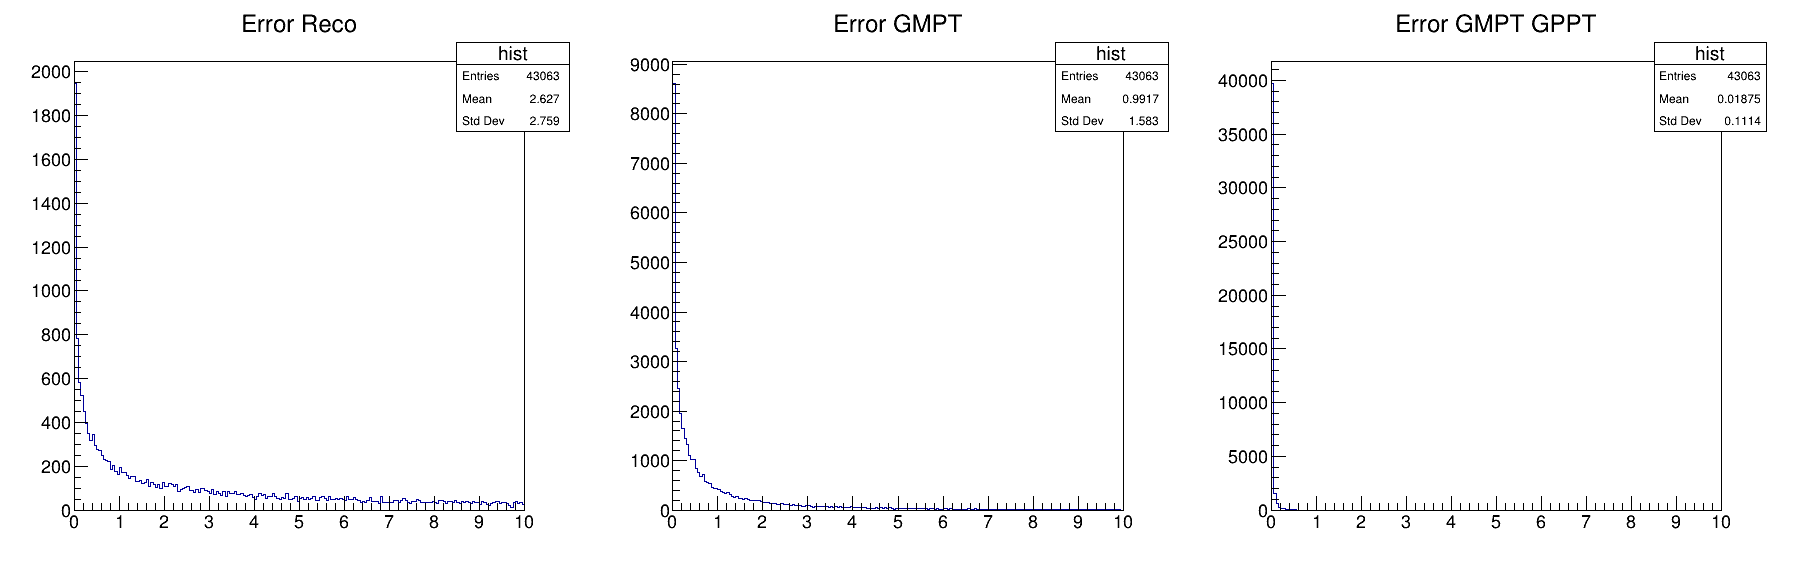

In [150]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 600)
canvas.Divide(3, 1)

nbins, xlow, xhigh = 200, 0, 10


h1 = df.Histo1D(("hist", "Error Reco", nbins, xlow, xhigh), "SqError_Reco")
h2 = df.Histo1D(("hist", "Error GMPT", nbins, xlow, xhigh), "SqError_GMPTGEN")
h3 = df.Histo1D(("hist", "Error GMPT GPPT", nbins, xlow, xhigh), "SqError_GMPTGEN_GPPTGEN")

print(np.sqrt(h1.GetMean()))
print(np.sqrt(h2.GetMean()))
print(np.sqrt(h3.GetMean()))

p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")

canvas.Draw()